In [1]:
import math, sys, os
import numpy as np
import scipy.linalg as cp
from  matplotlib import pyplot as plt
from numba import njit

In [2]:
@njit
def jacobiHE2D(U, alpha, N, T):
    r = 1./(1.+4.*alpha)
    Atemp = U.copy()
    for xx in range(1,N):
        for yy in range(1,N):
            U[xx,yy] = r*(alpha*(Atemp[xx,yy+1]+Atemp[xx,yy-1]+Atemp[xx+1,yy]+Atemp[xx-1,yy])+Atemp[xx,yy])
    return U

201 50.0
101 101
[[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


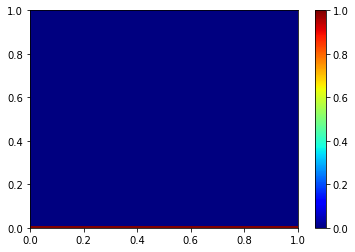

In [3]:
N = 100

#Tmax = 0.25

#T = int(Tmax/dt)
x,dx = np.linspace(0,1,N+1,retstep=True)
y = x.copy()
dt=5e-5
T = int(1/dt)+1

alpha = dt/dx**2

U = np.zeros((N+1,N+1))

U[:,0]  = 0.
U[:,-1] = 1.
U[0,:]  = 1.
U[-1,:] = 0.

#U[:,0,:] = 0.
#U[:,-1,:] = 1.
#U[0,:,:] = 0.
#U[-1,:,:] = 1.

print(T, alpha)
print(U.shape[0],U.shape[1])#,U.shape[2])
print(U)
#print(U[:,:,1])
#print(U[:,:,0])
fig, ax = plt.subplots()
im = ax.pcolormesh(x,y,U,cmap='jet',vmin=0., vmax=1.)
cbar = fig.colorbar(im)
plt.savefig("test0"+".png", format='png')

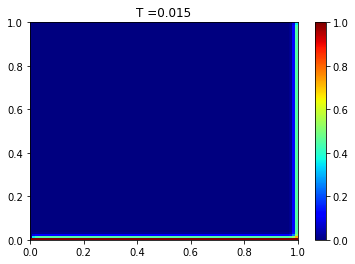

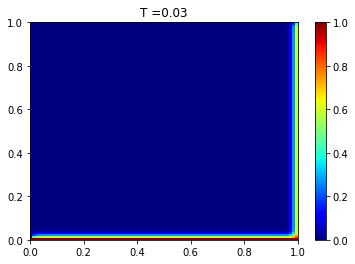

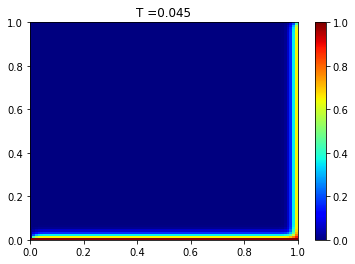

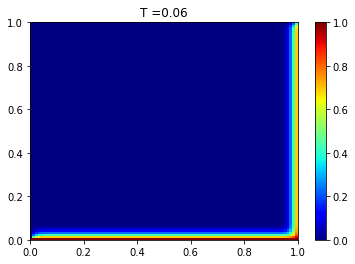

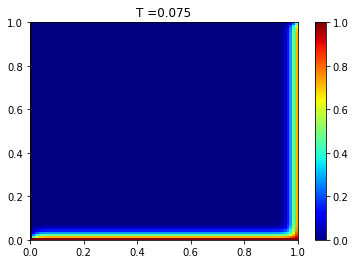

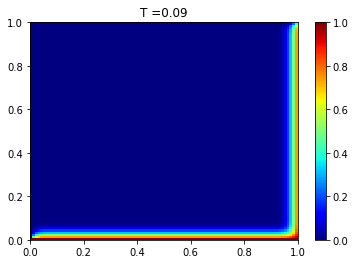

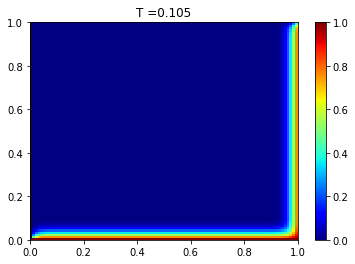

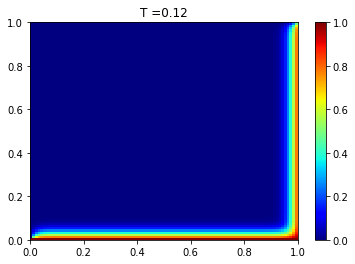

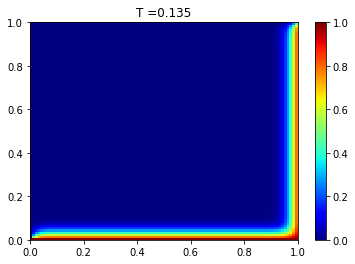

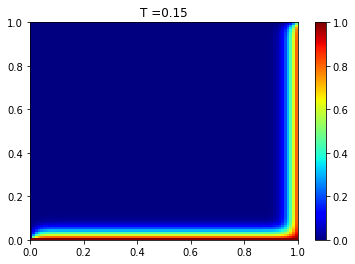

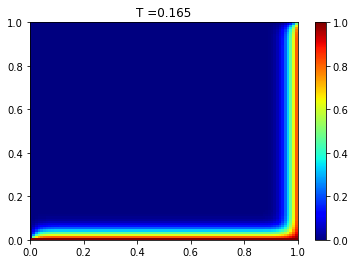

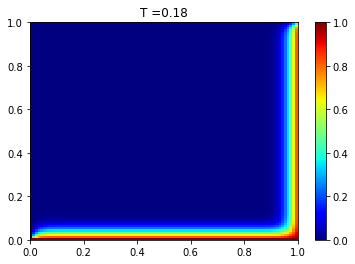

In [4]:
img = 1
for tt in range(1,T):
    U = jacobiHE2D(U, alpha, N, T)
    #if tt*dt==0.015 or tt*dt==0.03 or tt*dt==0.045 or tt*dt==0.060 or tt*dt==0.075 or tt*dt==0.09 or tt*dt==0.105 or tt*dt==0.12 or tt*dt==0.135 or tt*dt==0.15 or tt*dt==0.165 or tt*dt==0.180:
    fig, ax = plt.subplots()
    im = ax.pcolormesh(x,y,U,cmap='jet',vmin=0., vmax=1.)
    cbar = fig.colorbar(im)
    plt.title("T ="+str(dt*tt))
    plt.savefig("test"+str(img)+".png", format='png')
    del fig,ax,im,cbar
    img += 1
#print(U)